# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [58]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# Empty list for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#make url and save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Set up lists to hold response info:
name=[]         # list for city name
cloud=[]        # list for cloudines
ctry=[]         # list for country
date=[]         # list for date
humi=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxtemp=[]      # list for max temperature
wind=[]         # list for wind speed

# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:

count=1 # Set counter to start value 1 for printouts of the current set count.

print('Start Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record Number ' + str(count) + ' of ' + str(len(cities)) + ' -- ' + city)
        
        try:                                                # Ignore errors in response.
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...') # In case one of the responses comes back with error "KeyError"
                                                            # which could be the city or one of the data points missing.    
        count=count+1

Start Data Retrieval
-----------------------------
Processing Record Number 1 of 623 -- hilo
Processing Record Number 2 of 623 -- ribeira grande
Processing Record Number 3 of 623 -- haines junction
Processing Record Number 4 of 623 -- lufilufi
Processing Record Number 5 of 623 -- victoria
Processing Record Number 6 of 623 -- kubrat
Processing Record Number 7 of 623 -- hobart
Processing Record Number 8 of 623 -- ushuaia
Processing Record Number 9 of 623 -- nikolskoye
Processing Record Number 10 of 623 -- jamestown
Processing Record Number 11 of 623 -- georgetown
Processing Record Number 12 of 623 -- rikitea
Processing Record Number 13 of 623 -- bay roberts
Processing Record Number 14 of 623 -- barrow
Processing Record Number 15 of 623 -- vaini
Processing Record Number 16 of 623 -- chicama
Processing Record Number 17 of 623 -- mar del plata
Processing Record Number 18 of 623 -- yellowknife
Processing Record Number 19 of 623 -- bredasdorp
Processing Record Number 20 of 623 -- port hardy
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#make a dataframe to put info from api into
weather_dict = {
    'City': name,
    'Country': ctry,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness %': cloud,
    'Humidity %': humi,
    'Max temp (F)': maxtemp,
    'Wind speed (mph)': wind
}

weather_df = pd.DataFrame(weather_dict)

#len(weather_df)

#clean up weather_dict
weather_df.dropna()
weather_df.count()

City                577
Country             577
Date                577
Lat                 577
Lng                 577
Cloudiness %        577
Humidity %          577
Max temp (F)        577
Wind speed (mph)    577
dtype: int64

In [8]:
#export the data into a csv file
weather_df.to_csv('../exported_weather_files')

#call head on the dataframe to display it
weather_df.head()

,City,Country,Date,Lat,Lng,Cloudiness %,Humidity %,Max temp (F),Wind speed (mph)
0,Hilo,US,1659222514,19.7297,-155.0900,100,77,90.28,10.36
1,Ribeira Grande,PT,1659222810,38.5167,-28.7000,15,68,74.46,2.04
2,Haines Junction,CA,1659222810,60.7522,-137.5108,82,41,71.51,7.14
3,Lufilufi,WS,1659222811,-13.8745,-171.5986,24,79,79.79,20.11
4,Hong Kong,HK,1659222550,22.2855,114.1577,39,86,86.38,3.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#look to see if there are any cities that have humidity over 100%. 
#I know from looking at the data that this is NOT the case, because the highest humidity rating a city can have it %100.
#However, I will check with code to show this. Scrolling through my quick humudity check I see that no cities return "TRUE"for above 100.

humidity_check = weather_df["Humidity %"] > 100
list(humidity_check)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [10]:
#  Get the indices of cities that have humidity over 100%.
    #there are none.

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
    #I do not need to do this, as no cities had humidity above 100%


In [12]:
#use the CSV file to prevent my computer from running slow having to call the query for each plot below
load_file = '../exported_weather_files'

#read and store CSV into the dataframe
weather_df=pd.read_csv(load_file)

weather_df.head()


,Unnamed: 0,City,Country,Date,Lat,Lng,Cloudiness %,Humidity %,Max temp (F),Wind speed (mph)
0,0,Hilo,US,1659222514,19.7297,-155.0900,100,77,90.28,10.36
1,1,Ribeira Grande,PT,1659222810,38.5167,-28.7000,15,68,74.46,2.04
2,2,Haines Junction,CA,1659222810,60.7522,-137.5108,82,41,71.51,7.14
3,3,Lufilufi,WS,1659222811,-13.8745,-171.5986,24,79,79.79,20.11
4,4,Hong Kong,HK,1659222550,22.2855,114.1577,39,86,86.38,3.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

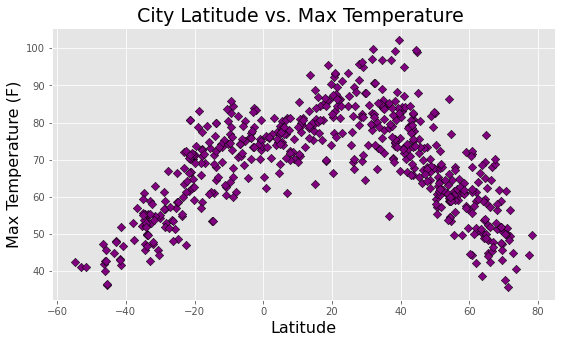

In [13]:
#create a scatterplot that shows latitude vs. tempurature for all cities in dataset
plt.figure(figsize=(9,5))
plt.scatter(weather_df['Lat'], weather_df['Max temp (F)'], marker='D', edgecolors='black', color='purple')
            
#add graph elements
plt.title('City Latitude vs. Max Temperature ', fontsize=19)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#save figure
plt.savefig('MaxTemp vs. City Latitude.png')
            
#slow plot
plt.show()

## Latitude vs. Humidity Plot

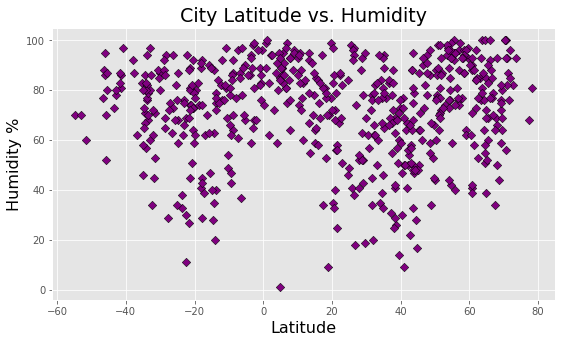

In [14]:
#create a scatterplot that shows latitude vs. tempurature for all cities in dataset
plt.figure(figsize=(9,5))
plt.scatter(weather_df['Lat'], weather_df['Humidity %'], marker='D', edgecolors='black', color='purple')
            
#add graph elements
plt.title('City Latitude vs. Humidity', fontsize=19)
plt.ylabel('Humidity %', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#save figure
plt.savefig('Humidity vs. City Latitude.png')
            
#slow plot
plt.show()

## Latitude vs. Cloudiness Plot

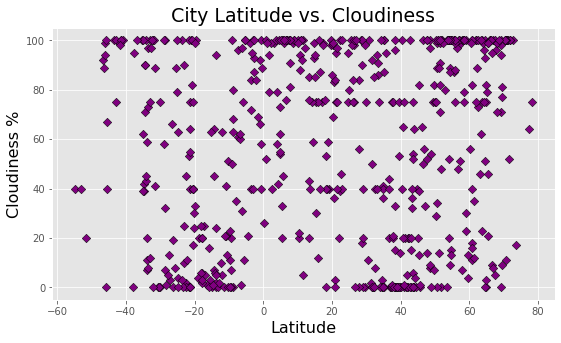

In [15]:
#create a scatterplot that shows latitude vs. tempurature for all cities in dataset
plt.figure(figsize=(9,5))
plt.scatter(weather_df['Lat'], weather_df['Cloudiness %'], marker='D', edgecolors='black', color='purple')
            
#add graph elements
plt.title('City Latitude vs. Cloudiness', fontsize=19)
plt.ylabel('Cloudiness %', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#save figure
plt.savefig('Cloudiness vs. City Latitude.png')
            
#slow plot
plt.show()

## Latitude vs. Wind Speed Plot

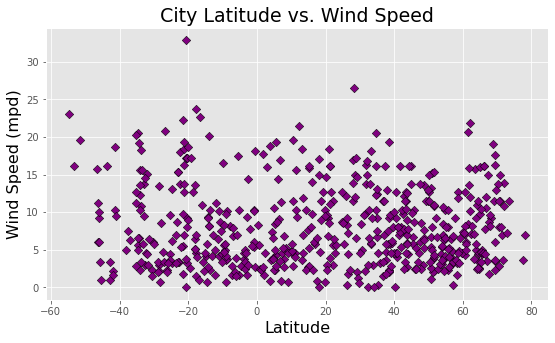

In [16]:
#create a scatterplot that shows latitude vs. tempurature for all cities in dataset
plt.figure(figsize=(9,5))
plt.scatter(weather_df['Lat'], weather_df['Wind speed (mph)'], marker='D', edgecolors='black', color='purple')
            
#add graph elements
plt.title('City Latitude vs. Wind Speed', fontsize=19)
plt.ylabel('Wind Speed (mpd)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

#save figure
plt.savefig('Wind Speed vs. City Latitude.png')
            
#slow plot
plt.show()

## Linear Regression

In [17]:
#create two dataframes, one for northern hemisphere and one for southern hemisphere, to be used in the below regressions
northern_weather = weather_df[weather_df['Lat'] >= 0]

southern_weather = weather_df[weather_df['Lat'] < 0]

#northern_weather.count()
#southern_weather.count()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

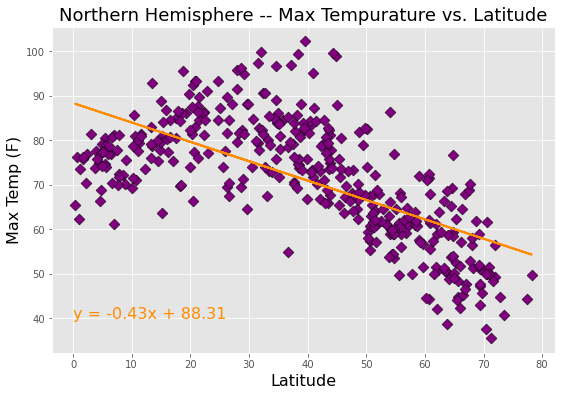

In [40]:
#create values to use in regression equation
x = northern_weather['Lat']
y = northern_weather['Max temp (F)']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Northern Hemisphere -- Max Tempurature vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Max Temp (F)', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(0, 40), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Northern Hem - Max Temp vs. Lat.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

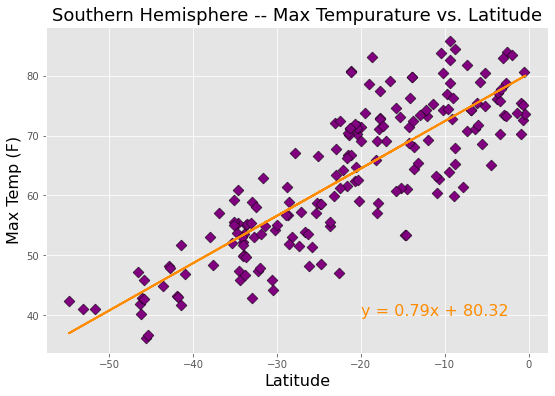

In [42]:
#create values to use in regression equation
x = southern_weather['Lat']
y = southern_weather['Max temp (F)']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Southern Hemisphere -- Max Tempurature vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Max Temp (F)', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(-20, 40), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Southern Hem - Max Temp vs. Lat.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

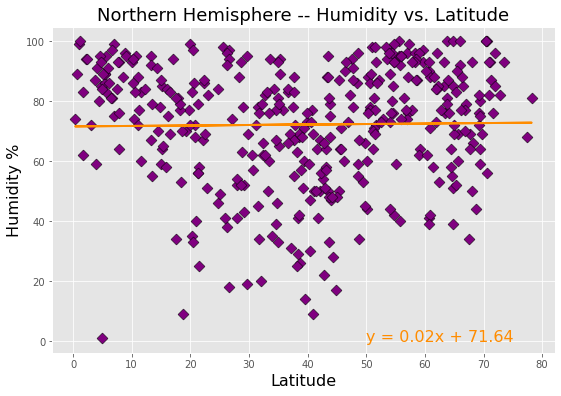

In [44]:
#create values to use in regression equation
x = northern_weather['Lat']
y = northern_weather['Humidity %']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Northern Hemisphere -- Humidity vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Humidity %', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(50, 0), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Northern Hem - Humid vs. Lat.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

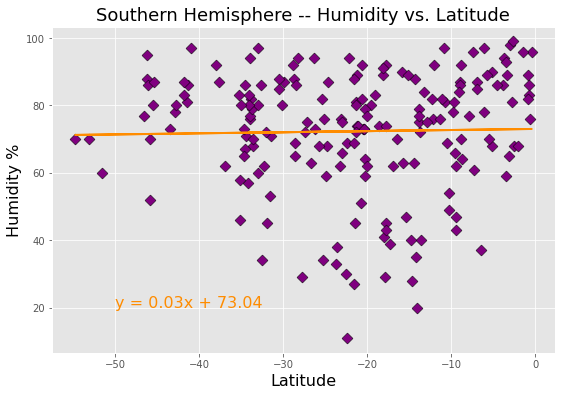

In [46]:
#create values to use in regression equation
x = southern_weather['Lat']
y = southern_weather['Humidity %']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Southern Hemisphere -- Humidity vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Humidity %', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(-50, 20), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Southern Hem - Humid vs. Lat.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

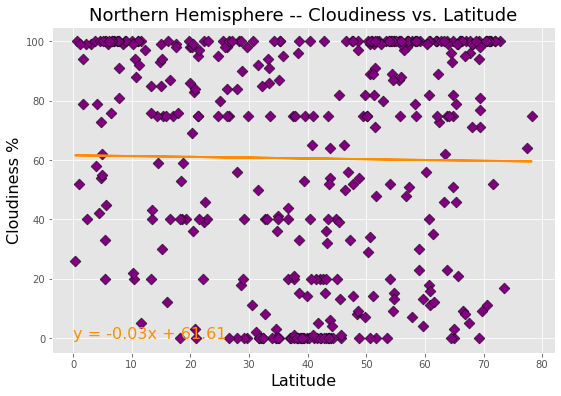

In [48]:
#create values to use in regression equation
x = northern_weather['Lat']
y = northern_weather['Cloudiness %']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Northern Hemisphere -- Cloudiness vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Cloudiness %', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(0, 0), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Northern Hem - Cloudiness vs. Lat.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

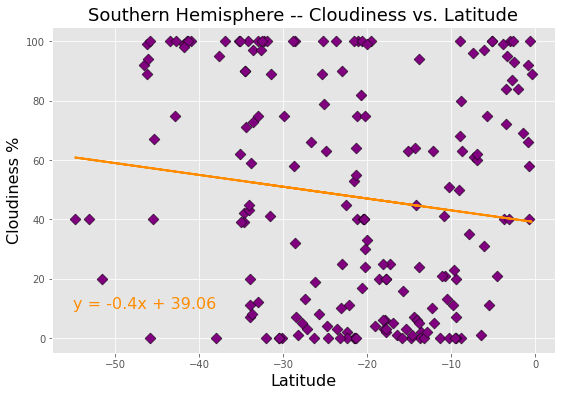

In [52]:
#create values to use in regression equation
x = southern_weather['Lat']
y = southern_weather['Cloudiness %']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Southern Hemisphere -- Cloudiness vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Cloudiness %', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(-55, 10), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Southern Hem - Cloudiness vs. Lat.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

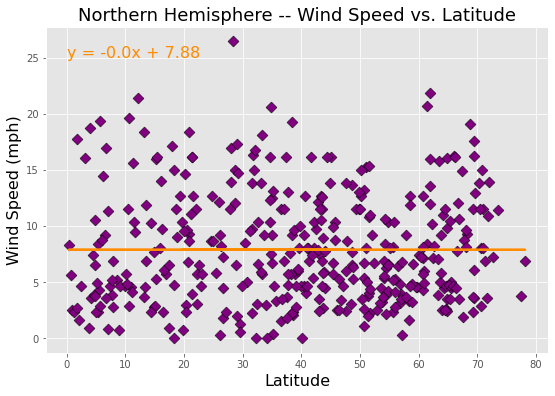

In [54]:
#create values to use in regression equation
x = northern_weather['Lat']
y = northern_weather['Wind speed (mph)']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Northern Hemisphere -- Wind Speed vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(0, 25), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Northern Hem - Wind speed (mph) vs. Lat.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

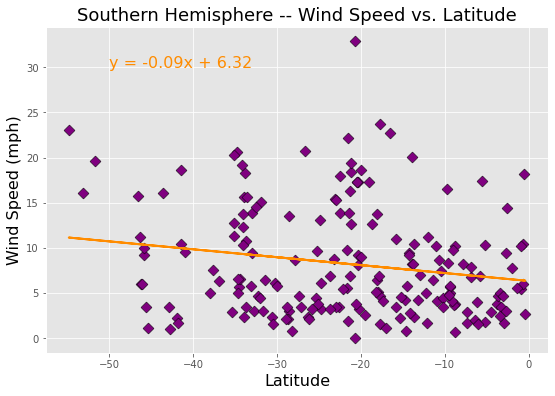

In [56]:
#create values to use in regression equation
x = southern_weather['Lat']
y = southern_weather['Wind speed (mph)']
plt.figure(figsize=(9,6))

#run the linear regression between requested variables 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#create regression variable to use for line in plot
regression_values = x * slope + intercept

#print(regression_values)

#make plot with the above regression
plt.scatter(x,y, marker='D', s=[60], color='purple', edgecolors='black')
plt.plot(x,regression_values, 'darkorange', linewidth=2)

#add plot elements
plt.title('Southern Hemisphere -- Wind Speed vs. Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=16, color='black')
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
    #create line equation for plot
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #add line equation to plot
plt.annotate(line_equation,(-50, 30), fontsize=16, color='darkorange')

#save the plot
plt.savefig('Southern Hem - Wind speed (mph) vs. Lat.png')

plt.show()